In [99]:
import pandas as pd 
import numpy as np 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from matplotlib import pyplot as plot

In [100]:
dataDir="/home/colette_berg/YNP/AHQsd_2021/gatk_stacks/"
genotypes="AHQsd_gatk_filtered.012"

In [101]:
# read in the data -- genotypes, sites, and individuals and phase.

data_genotypes = pd.read_csv(dataDir + genotypes, sep="\t", index_col=False, header=None).iloc[:, 1:]
data_indv = pd.read_csv(dataDir + genotypes + ".indv", sep="\t", index_col=False, header=None)
data_sites = pd.read_csv(dataDir + genotypes + ".pos", sep="\t", index_col=False, header=None)

# format the names of the sites
tmpDF = pd.DataFrame(columns=['scaffold','chr'])
tmpDF[['scaffold','chr']] = data_sites[0].str.split('_', expand=True)

data_sites['chr'] = tmpDF['chr']
data_sites['site'] = data_sites[0].astype(str) + ['_'] + data_sites[1].astype(str)

# paste NT data and AHQsd data together
# AHQsd_and_NT = pd.concat([NT_data, data_genotypes])

# all_indv = pd.concat([NT_indv, data_indv])

# add columns and row names 
data_genotypes.columns = data_sites['site']
data_genotypes.insert(0, 'indv', data_indv[0])

# transpose for filtering fun
genotypes_transposed = data_genotypes.set_index('indv').T

# replace -1 with NaN
genotypes_transposed = genotypes_transposed.replace(-1, np.NaN)

genotypes_transposed.reset_index(inplace=True)


/tmp/ipykernel_1337682/3264728453.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  genotypes_transposed.reset_index(inplace=True)


In [102]:
tdf = genotypes_transposed.set_index('site').T.reset_index()
# make a list of all the sites (these are the same as column names)
siteList = list(tdf)

refCount = []
hetCount = []
altCount = []

# make a dataframe containing chr numbers and site numbers
distortionDF = pd.DataFrame(columns=['genome','chr','site'])
distortionDF[['genome','chr','site']] = genotypes_transposed['site'].str.split('_', expand=True)

# loop through and count all the ref, het, and alt genotypes at each site
for i in siteList:
    countT = (tdf[i]==0.0).sum()
    refCount.append(countT)

for i in siteList:
    countHet = (tdf[i]==1.0).sum()
    hetCount.append(countHet)

for i in siteList:
    countN = (tdf[i]==2.0).sum()
    altCount.append(countN)

In [103]:
# remove first column
altCount = altCount[1::]
hetCount = hetCount[1::]
refCount= refCount[1::]

# convert from int to numeric
altCount = pd.to_numeric(altCount)
hetCount = pd.to_numeric(hetCount)
refCount = pd.to_numeric(refCount)

# calculate the sum
total = altCount + hetCount + refCount

refRatio = np.divide(refCount, total)
hetRatio = np.divide(hetCount, total)
altRatio = np.divide(altCount, total)

distortionDF['refRatio'] = refRatio
distortionDF['hetRatio'] = hetRatio
distortionDF['altRatio'] = altRatio

In [104]:
c1 = distortionDF[distortionDF['chr'] == "1"]
c2 = distortionDF[distortionDF['chr'] == "2"]
c3 = distortionDF[distortionDF['chr'] == "3"]
c4 = distortionDF[distortionDF['chr'] == "4"]

c5 = distortionDF[distortionDF['chr'] == "5"]
c6 = distortionDF[distortionDF['chr'] == "6"]
c7 = distortionDF[distortionDF['chr'] == "7"]
c8 = distortionDF[distortionDF['chr'] == "8"]

c9 = distortionDF[distortionDF['chr'] == "9"]
c10 = distortionDF[distortionDF['chr'] == "10"]
c11 = distortionDF[distortionDF['chr'] == "11"]
c12 = distortionDF[distortionDF['chr'] == "12"]

c13 = distortionDF[distortionDF['chr'] == "13"]
c14 = distortionDF[distortionDF['chr'] == "14"]

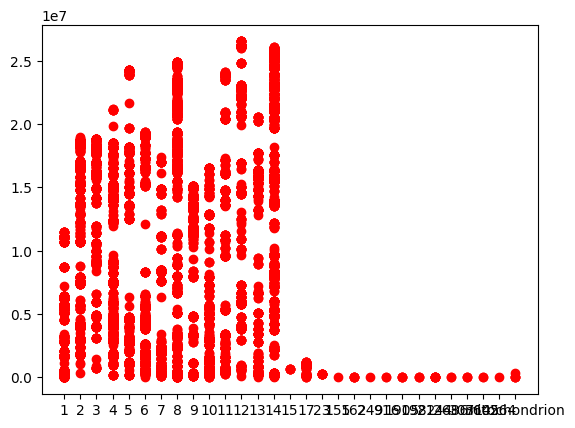

In [105]:
plot.plot(distortionDF['chr'], pd.to_numeric(distortionDF['site']), 'ro')

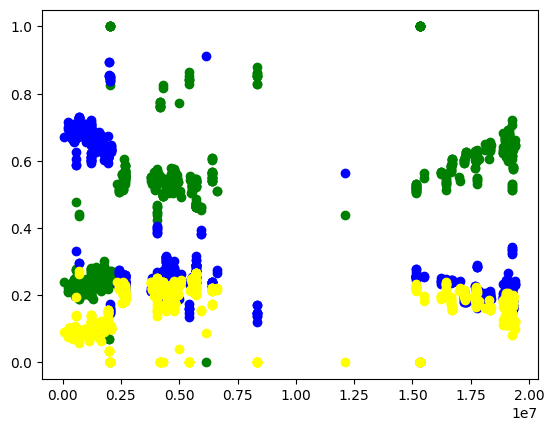

In [107]:
plot.scatter(pd.to_numeric(c6['site']), c6['hetRatio'], c="green")
plot.scatter(pd.to_numeric(c6['site']), c6['refRatio'], c="blue")
plot.scatter(pd.to_numeric(c6['site']), c6['altRatio'], c="yellow")

#plot.scatter(pd.to_numeric(c11['site']), c11['hetRatio'], c="green")
#plot.scatter(pd.to_numeric(c11['site']), c11['refRatio'], c="blue")
#plot.scatter(pd.to_numeric(c11['site']), c11['altRatio'], c="yellow")
